In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv(r'/UpdatedResumeDataSet.csv')
print(data.head(20))
print(data.tail(20))


        Category                                             Resume
0   Data Science  Skills * Programming Languages: Python (pandas...
1   Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2   Data Science  Areas of Interest Deep Learning, Control Syste...
3   Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4   Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
5   Data Science  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...
6   Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7   Data Science  Education Details \r\n B.Tech   Rayat and Bahr...
8   Data Science  Personal Skills â¢ Ability to quickly grasp t...
9   Data Science  Expertise â Data and Quantitative Analysis â...
10  Data Science  Skills * Programming Languages: Python (pandas...
11  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
12  Data Science  Areas of Interest Deep Learning, Control Syste...
13  Data Science  Skills â¢ R â¢ Python â¢ SA

In [6]:
print(data['Category'].unique())
print("total unique category: {}". format(len(data['Category'].unique())))
print(data['Category'].value_counts())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
total unique category: 25
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
B

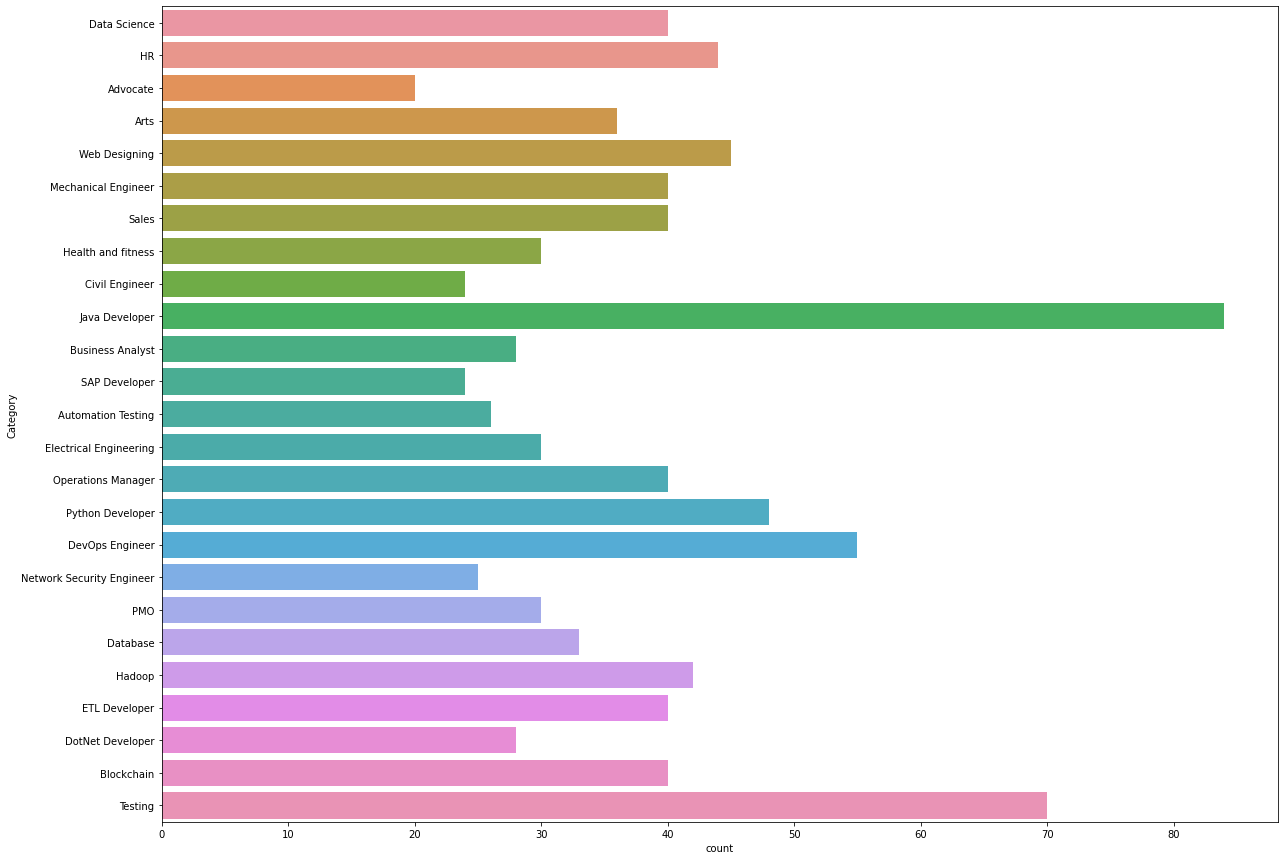

In [7]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.countplot(y="Category",data=data)


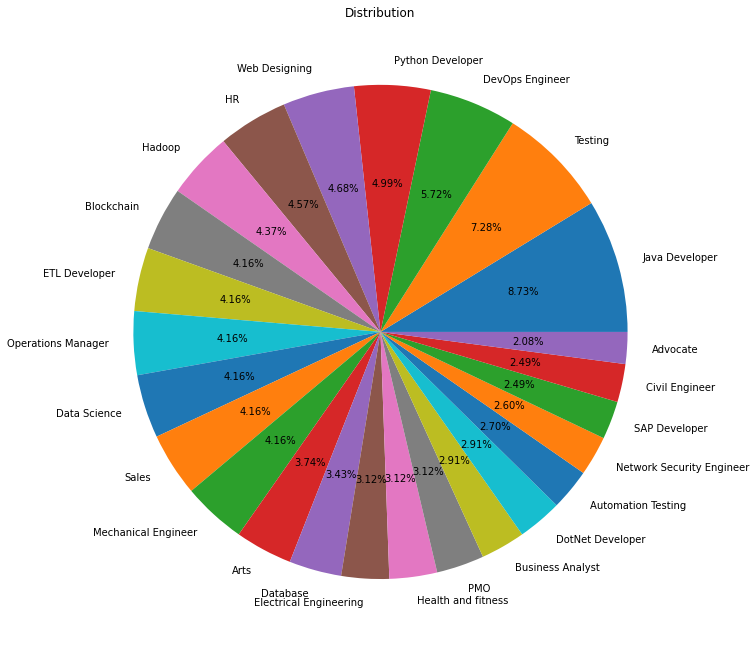

In [8]:
from matplotlib.gridspec import GridSpec
count=data['Category'].value_counts()
label=data['Category'].value_counts().keys()

plt.figure(1, figsize=(25,25))
grid=GridSpec(2,2)

cmap=plt.get_cmap('coolwarm')

color=[cmap(i) for i in np.linspace(0, 1, 5)]
plt.subplot(grid[0,1], aspect=1, title='Distribution')

pie=plt.pie(count, labels=label, autopct='%1.2f%%')
plt.show()

In [9]:
import re
def clean(text):
    text=re.sub('http\S+\s*', ' ', text)
    text=re.sub('RT|cc', ' ', text)
    text=re.sub('#\S+', '', text)
    text=re.sub('@\S+', '', text)
    text=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text=re.sub('\s+', ' ', text)
    text=re.sub(r'[^\x00-\x7f]', r' ', text)
    return text

data['clean text']=data.Resume.apply(lambda x: clean(x))
print(data['clean text'])

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills     R     Python     SAP HANA     Table...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills     Proficient in MS office Wo...
958        Willingness to a ept the challenges     Po...
959    PERSONAL SKILLS     Quick learner     Eagernes...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: clean text, Length: 962, dtype: object


In [10]:
import nltk
#nltk.download()
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
stopwords=set(stopwords.words('english')+['``',"''"])

In [18]:

total_words=[]
sentences=data['Resume'].values
cleanSentences =""
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
for i in range(0,200):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)
            

In [21]:
   
word_freq_dist=nltk.FreqDist(total_words)
most_common=word_freq_dist.most_common(100)



[('Details', 609), ('Exprience', 580), ('months', 478), ('company', 459), ('description', 427), ('1', 384), ('Project', 269), ('year', 261), ('January', 253), ('Maharashtra', 244), ('6', 225), ('Less', 224), ('data', 223), ('project', 212), ('Skill', 206), ('Data', 203), ('Web', 196), ('application', 192), ('Education', 177), ('I', 174), ('time', 169), ('College', 168), ('Python', 156), ('Science', 154), ('Pune', 154), ('Used', 152), ('Software', 151), ('Engineering', 147), ('The', 146), ('University', 140), ('like', 139), ('Nagpur', 138), ('C', 137), ('SQL', 136), ('monthsCompany', 134), ('Roles', 134), ('B', 132), ('Responsibility', 130), ('developed', 128), ('Technologies', 127), ('2', 123), ('India', 122), ('Designed', 121), ('website', 120), ('Machine', 118), ('UI', 117), ('Learning', 116), ('Developer', 116), ('Mumbai', 115), ('using', 114), ('24', 111), ('Database', 110), ('development', 105), ('Description', 103), ('Responsibilities', 100), ('S', 100), ('A', 99), ('BOOTSTRAP', 

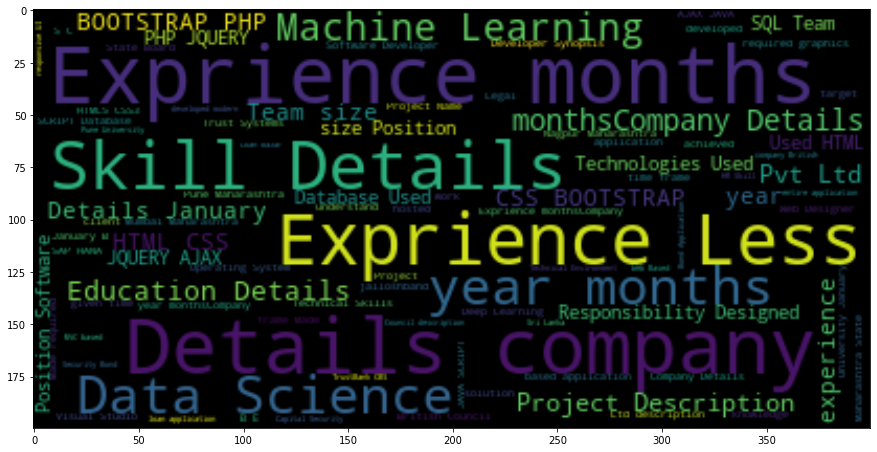

In [22]:

print(most_common)

WC=WordCloud().generate(cleanSentences)
plt.figure(figsize=(15,15))
plt.imshow(WC, interpolation='bilinear')

In [23]:

from sklearn.preprocessing import LabelEncoder

var=['Category']
le=LabelEncoder()

for i in var:
    data[i]=le.fit_transform(data[i])
    
print(data)

     Category                                             Resume  \
0           6  Skills * Programming Languages: Python (pandas...   
1           6  Education Details \r\nMay 2013 to May 2017 B.E...   
2           6  Areas of Interest Deep Learning, Control Syste...   
3           6  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4           6  Education Details \r\n MCA   YMCAUST,  Faridab...   
..        ...                                                ...   
957        23  Computer Skills: â¢ Proficient in MS office (...   
958        23  â Willingness to accept the challenges. â ...   
959        23  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...   
960        23  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...   
961        23  Skill Set OS Windows XP/7/8/8.1/10 Database MY...   

                                            clean text  
0    Skills Programming Languages Python pandas num...  
1    Education Details May 2013 to May 2017 B E UIT...  
2    Areas o

In [24]:


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

text=data['clean text'].values
terget=data['Category'].values

vect=TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=2000)

vect.fit(text)

Word_feature=vect.transform(text)
print(Word_feature)

  (0, 1994)	0.0265735031561229
  (0, 1977)	0.03014267434003902
  (0, 1975)	0.09937632901862738
  (0, 1942)	0.061915755143193044
  (0, 1929)	0.06874855398637747
  (0, 1927)	0.02907535024897289
  (0, 1916)	0.027964754005653163
  (0, 1914)	0.07460564975827198
  (0, 1913)	0.035618243115328276
  (0, 1909)	0.04958441845948405
  (0, 1888)	0.040674894590355434
  (0, 1887)	0.04398736856734131
  (0, 1845)	0.1834460157938414
  (0, 1844)	0.07305082602592586
  (0, 1843)	0.10437730108890889
  (0, 1835)	0.05559632107739259
  (0, 1824)	0.12988685974007896
  (0, 1819)	0.0602218784616735
  (0, 1809)	0.04636500743977512
  (0, 1808)	0.07116610323363504
  (0, 1806)	0.050748205256445064
  (0, 1802)	0.02229235962823141
  (0, 1784)	0.13089761388808174
  (0, 1782)	0.04959410739618
  (0, 1771)	0.13398373704904817
  :	:
  (961, 454)	0.12943301141388372
  (961, 425)	0.06447098864793699
  (961, 423)	0.08322157321646687
  (961, 368)	0.024529479792744214
  (961, 350)	0.07928662185867637
  (961, 326)	0.10458573553423

In [25]:
x_train, x_test, y_train, y_test=train_test_split(Word_feature, terget, random_state=0, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

import sklearn
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model=OneVsOneClassifier(LogisticRegression())
model.fit(x_train, y_train)
prediction=model.predict(x_test)

print("training Score: {:.2f}".format(model.score(x_train, y_train)))
print("test Score: {:.2f}".format(model.score(x_test, y_test)))



(769, 2000)
(193, 2000)
training Score: 0.99
test Score: 0.96


In [27]:
print(y_test)
prediction

[20 14  6 17 15 14 10 14 15  2  6 23  4 11 13  4 19  8  8  9 12 11 17 22
 19 16  5  8  3  8 20 18 22  7 23 23 22 18  7 20 10 20 14  8 15 15  8 11
  4 22  1 24 14 15 22 23  8 15  3 17 18  3  0 15 15 15 16 21 13 18 12 23
 22 12 13 22  8  7 19  4 24 14  7  1 24 13 12 10  9  8 22  9 23 11  9 23
 11 15 23 13  4 17  2  5  6 10  0 19 20 10 22 10 15 10 15 15 22  6 14  6
  0  4  5  7  9 13 23  6  9  9 21 11  5  3  9 24 19 13  8  3 13 13 11 20
 16 23 21 24  7 21 20 15 22 19 15 23  9 15 15  6  2 20  7 11 23 24  8  3
 20  2 10 22 15  2 11 23  1 23  6  3  3 24 24 12  5 23 18 22 20 20  3  6
 15]


array([20, 14,  6, 17, 15, 14, 10, 14, 15, 23,  6, 23,  4, 11, 13,  4, 19,
        8,  8,  9, 12, 11, 17, 22, 19, 16,  5,  8,  3, 15, 20, 18, 22,  7,
       23, 23, 22, 18,  7, 20, 10, 20, 14,  8, 15, 15,  8, 23,  4, 22,  1,
       24, 14, 15, 22, 23,  8, 15,  3, 17, 18,  3,  0, 15, 15, 15, 16, 21,
       13, 18, 12, 23, 22, 12, 13, 22,  8,  7, 19, 15, 24, 14,  7,  1, 24,
       13, 12, 10,  9,  8, 22,  9, 23, 23,  9, 23, 23, 15, 23, 13,  4, 17,
        2,  5,  6, 10,  0, 19, 20, 10, 22, 10, 15, 10, 15, 15, 22,  6, 14,
        6,  0,  4,  5,  7,  9, 13, 23,  6,  9,  9, 21, 11,  5,  3,  9, 24,
       19, 13,  8,  3, 13, 13, 23, 20, 16, 23, 21, 24,  7, 21, 20, 15, 22,
       19, 15, 23,  9, 15, 15,  6,  2, 20,  7, 23, 23, 24,  8,  3, 20,  2,
       10, 22, 15,  2, 11, 23,  1, 23,  6,  3,  3, 24, 24, 12,  5, 23, 18,
       22, 20, 20,  3,  6, 15])

In [28]:
from sklearn import metrics
#print model report on  a txt file

f=open("ModelReport.txt","w")
f=f.write("model report:"+str(model)+"\n"+str(metrics.classification_report(y_test, prediction)))

print("model report: %s: \n %s\n" % (model, metrics.classification_report(y_test, prediction)))



model report: OneVsOneClassifier(estimator=LogisticRegression()): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      0.44      0.62         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       0.90      1.00      0.95        19
          16 

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train, y_train)
y_train_pred1 = model.predict(x_train)
y_test_pred1 = model.predict(x_test)
Knn_mse_train=mean_squared_error(y_train, y_train_pred1)
Knn_mse_test=mean_squared_error(y_test, y_test_pred1)

Knn_r2score_train=r2_score(y_train, y_train_pred1)
Knn_r2score_test=r2_score(y_test, y_test_pred1)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_test_pred1.squeeze()})
Knn_mae = mean_absolute_error(y_test, y_test_pred1)
Knn_mse = mean_squared_error(y_test, y_test_pred1)
Knn_rmse = np.sqrt(Knn_mse)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred1),
                mean_squared_error(y_test, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred1), r2_score(y_test, y_test_pred1)))
print(df_preds)
print(f'Mean absolute error: {Knn_mae:.2f}')
print(f'Mean squared error: {Knn_mse:.2f}')
print(f'Root mean squared error: {Knn_rmse:.2f}')

MSE train: 0.285, test: 1.746
R^2 train: 0.994, test: 0.964
     Actual  Predicted
0        20         20
1        14         14
2         6          6
3        17         17
4        15         15
..      ...        ...
188      20         20
189      20         20
190       3          3
191       6          6
192      15         15

[193 rows x 2 columns]
Mean absolute error: 0.13
Mean squared error: 1.75
Root mean squared error: 1.32


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)
y_train_pred2 = model.predict(x_train)
y_test_pred2 = model.predict(x_test)
Logistic_mse_train=mean_squared_error(y_train, y_train_pred2)
Logistic_mse_test=mean_squared_error(y_test, y_test_pred2)

Logistic_r2score_train=r2_score(y_train, y_train_pred2)
Logistic_r2score_test=r2_score(y_test, y_test_pred2)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_test_pred2.squeeze()})
Logistic_mae = mean_absolute_error(y_test, y_test_pred2)
Logistic_mse = mean_squared_error(y_test, y_test_pred2)
Logistic_rmse = np.sqrt(Logistic_mse)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred2),
                mean_squared_error(y_test, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred2), r2_score(y_test, y_test_pred2)))
print(df_preds)
print(f'Mean absolute error: {Logistic_mae:.2f}')
print(f'Mean squared error: {Logistic_mse:.2f}')
print(f'Root mean squared error: {Logistic_rmse:.2f}')

MSE train: 0.105, test: 0.674
R^2 train: 0.998, test: 0.986
     Actual  Predicted
0        20         20
1        14         14
2         6          6
3        17         17
4        15         15
..      ...        ...
188      20         20
189      20         20
190       3          3
191       6          6
192      15         15

[193 rows x 2 columns]
Mean absolute error: 0.08
Mean squared error: 0.67
Root mean squared error: 0.82


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state = 0)
model.fit(x_train, y_train)
y_train_pred3 = model.predict(x_train)
y_test_pred3 = model.predict(x_test)
DTree_mse_train=mean_squared_error(y_train, y_train_pred3)
DTree_mse_test=mean_squared_error(y_test, y_test_pred3)
DTree_r2score_train=r2_score(y_train, y_train_pred3)
DTree_r2score_test=r2_score(y_test, y_test_pred3)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_test_pred3.squeeze()})
DTree_mae = mean_absolute_error(y_test, y_test_pred3)
DTree_mse = mean_squared_error(y_test, y_test_pred3)
DTree_rmse = np.sqrt(DTree_mse)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred3),
                mean_squared_error(y_test, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred3), r2_score(y_test, y_test_pred3)))
print(df_preds)
print(f'Mean absolute error: {DTree_mae:.2f}')
print(f'Mean squared error: {DTree_mse:.2f}')
print(f'Root mean squared error: {DTree_rmse:.2f}')

MSE train: 0.000, test: 0.000
R^2 train: 1.000, test: 1.000
     Actual  Predicted
0        20         20
1        14         14
2         6          6
3        17         17
4        15         15
..      ...        ...
188      20         20
189      20         20
190       3          3
191       6          6
192      15         15

[193 rows x 2 columns]
Mean absolute error: 0.00
Mean squared error: 0.00
Root mean squared error: 0.00


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators = 5, random_state = 0)
model.fit(x_train, y_train)
y_train_pred4 = model.predict(x_train)
y_test_pred4 = model.predict(x_test)
RForesst_mse_train=mean_squared_error(y_train, y_train_pred4)
RForesst_mse_test=mean_squared_error(y_test, y_test_pred4)

RForesst_r2score_train=r2_score(y_train, y_train_pred4)
RForesst_r2score_test=r2_score(y_test, y_test_pred4)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_test_pred4.squeeze()})
RForesst_mae = mean_absolute_error(y_test, y_test_pred4)
RForesst_mse = mean_squared_error(y_test, y_test_pred4)
RForesst_rmse = np.sqrt(RForesst_mse)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred4),
                mean_squared_error(y_test, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred4), r2_score(y_test, y_test_pred4)))
print(df_preds)
print(f'Mean absolute error: {RForesst_mae:.2f}')
print(f'Mean squared error: {RForesst_mse:.2f}')
print(f'Root mean squared error: {RForesst_rmse:.2f}')

MSE train: 0.001, test: 0.010
R^2 train: 1.000, test: 1.000
     Actual  Predicted
0        20         20
1        14         14
2         6          6
3        17         17
4        15         15
..      ...        ...
188      20         20
189      20         20
190       3          3
191       6          6
192      15         15

[193 rows x 2 columns]
Mean absolute error: 0.01
Mean squared error: 0.01
Root mean squared error: 0.10


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier
plt.style.use('ggplot')
model=MLPClassifier()
model.fit(x_train, y_train)
y_train_pred5 = model.predict(x_train)
y_test_pred5 = model.predict(x_test)
MLP_mse_train=mean_squared_error(y_train, y_train_pred5)
MLP_mse_test=mean_squared_error(y_test, y_test_pred5)

MLP_r2score_train=r2_score(y_train, y_train_pred5)
MLP_r2score_test=r2_score(y_test, y_test_pred5)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_test_pred5.squeeze()})
MLP_mae = mean_absolute_error(y_test, y_test_pred5)
MLP_mse = mean_squared_error(y_test, y_test_pred5)
MLP_rmse = np.sqrt(MLP_mse)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred5),
                mean_squared_error(y_test, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred5), r2_score(y_test, y_test_pred5)))
print(df_preds)
print(f'Mean absolute error: {MLP_mae:.2f}')
print(f'Mean squared error: {MLP_mse:.2f}')
print(f'Root mean squared error: {MLP_rmse:.2f}')

MSE train: 0.000, test: 0.254
R^2 train: 1.000, test: 0.995
     Actual  Predicted
0        20         20
1        14         14
2         6          6
3        17         17
4        15         15
..      ...        ...
188      20         20
189      20         20
190       3          3
191       6          6
192      15         15

[193 rows x 2 columns]
Mean absolute error: 0.04
Mean squared error: 0.25
Root mean squared error: 0.50


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVC
regressor = SVC(kernel = 'rbf')
model=SVC()
model.fit(x_train, y_train)
y_train_pred6 = model.predict(x_train)
y_test_pred6 = model.predict(x_test)
SVC_mse_train=mean_squared_error(y_train, y_train_pred6)
SVC_mse_test=mean_squared_error(y_test, y_test_pred6)

SVC_r2score_train=r2_score(y_train, y_train_pred6)
SVC_r2score_test=r2_score(y_test, y_test_pred6)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_test_pred6.squeeze()})
SVC_mae = mean_absolute_error(y_test, y_test_pred6)
SVC_mse = mean_squared_error(y_test, y_test_pred6)
SVC_rmse = np.sqrt(SVC_mse)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred6),
                mean_squared_error(y_test, y_test_pred6)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred6), r2_score(y_test, y_test_pred6)))
print(df_preds)
print(f'Mean absolute error: {SVC_mae:.2f}')
print(f'Mean squared error: {SVC_mse:.2f}')
print(f'Root mean squared error: {SVC_rmse:.2f}')

MSE train: 0.000, test: 0.254
R^2 train: 1.000, test: 0.995
     Actual  Predicted
0        20         20
1        14         14
2         6          6
3        17         17
4        15         15
..      ...        ...
188      20         20
189      20         20
190       3          3
191       6          6
192      15         15

[193 rows x 2 columns]
Mean absolute error: 0.04
Mean squared error: 0.25
Root mean squared error: 0.50


In [41]:
from xgboost import XGBClassifier
xgb_classifier= XGBClassifier().fit(x_train, y_train)
y_train_pred7 = xgb_classifier.predict(x_train)
y_test_pred7 = xgb_classifier.predict(x_test)
XGBC_mse_train=mean_squared_error(y_train, y_train_pred7)
XGBC_mse_test=mean_squared_error(y_test, y_test_pred7)
XGBC_r2score_train=r2_score(y_train, y_train_pred7)
XGBC_r2score_test=r2_score(y_test, y_test_pred7)
df_preds_xgb = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_test_pred7.squeeze()})
XGBC_mae = mean_absolute_error(y_test, y_test_pred7)
XGBC_mse= mean_squared_error(y_test, y_test_pred7)
XGBC_rmse= np.sqrt(XGBC_mse)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred7),
                mean_squared_error(y_test, y_test_pred7)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred7), r2_score(y_test, y_test_pred7)))
print(df_preds_xgb)
print(f'Mean absolute error: {XGBC_mae:.2f}')
print(f'Mean squared error: {XGBC_mse:.2f}')
print(f'Root mean squared error: {XGBC_rmse:.2f}')

MSE train: 0.000, test: 0.000
R^2 train: 1.000, test: 1.000
     Actual  Predicted
0        20         20
1        14         14
2         6          6
3        17         17
4        15         15
..      ...        ...
188      20         20
189      20         20
190       3          3
191       6          6
192      15         15

[193 rows x 2 columns]
Mean absolute error: 0.00
Mean squared error: 0.00
Root mean squared error: 0.00


In [42]:

from sklearn.ensemble import BaggingClassifier
xgb_regressor= BaggingClassifier(

 base_estimator=SVC(),

 n_estimators=10,

 random_state=0

).fit(x_train, y_train)
y_train_pred8 = xgb_regressor.predict(x_train)
y_test_pred8 = xgb_regressor.predict(x_test)
Bagging_mse_train=mean_squared_error(y_train, y_train_pred8)
Bagging_mse_test=mean_squared_error(y_test, y_test_pred8)
Bagging_r2score_train=r2_score(y_train, y_train_pred8)
Bagging_r2score_test=r2_score(y_test, y_test_pred8)
df_preds_xgb = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_test_pred8.squeeze()})
Bagging_mae = mean_absolute_error(y_test, y_test_pred8)
Bagging_mse= mean_squared_error(y_test, y_test_pred8)
Bagging_rmse = np.sqrt(Bagging_mse)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred8),
                mean_squared_error(y_test, y_test_pred8)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred7), r2_score(y_test, y_test_pred8)))
print(df_preds_xgb)
print(f'Mean absolute error: {Bagging_mae:.2f}')
print(f'Mean squared error: {Bagging_mse:.2f}')
print(f'Root mean squared error: {Bagging_rmse:.2f}')

MSE train: 0.159, test: 0.891
R^2 train: 1.000, test: 0.982
     Actual  Predicted
0        20         20
1        14         14
2         6          6
3        17         17
4        15         15
..      ...        ...
188      20         20
189      20         20
190       3          3
191       6          6
192      15         15

[193 rows x 2 columns]
Mean absolute error: 0.10
Mean squared error: 0.89
Root mean squared error: 0.94


In [43]:
from sklearn.linear_model import SGDClassifier
xgb_regressor= SGDClassifier().fit(x_train, y_train)
y_train_pred9 = xgb_regressor.predict(x_train)
y_test_pred9 = xgb_regressor.predict(x_test)
SGDC_mse_train=mean_squared_error(y_train, y_train_pred9)
SGDC_mse_test=mean_squared_error(y_test, y_test_pred9)
SGDC_r2score_train=r2_score(y_train, y_train_pred9)
SGDC_r2score_test=r2_score(y_test, y_test_pred9)
df_preds_xgb = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_test_pred9.squeeze()})
SGDC_mae = mean_absolute_error(y_test, y_test_pred9)
SGDC_mse= mean_squared_error(y_test, y_test_pred9)
SGDC_rmse = np.sqrt(SGDC_mse)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred9),
                mean_squared_error(y_test, y_test_pred9)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred9), r2_score(y_test, y_test_pred9)))
print(df_preds_xgb)
print(f'Mean absolute error: {SGDC_mae:.2f}')
print(f'Mean squared error: {SGDC_mse:.2f}')
print(f'Root mean squared error: {SGDC_rmse:.2f}')

MSE train: 0.000, test: 0.000
R^2 train: 1.000, test: 1.000
     Actual  Predicted
0        20         20
1        14         14
2         6          6
3        17         17
4        15         15
..      ...        ...
188      20         20
189      20         20
190       3          3
191       6          6
192      15         15

[193 rows x 2 columns]
Mean absolute error: 0.00
Mean squared error: 0.00
Root mean squared error: 0.00


In [44]:
evaluation = [('accuracy score test', Knn_r2score_test, Logistic_r2score_test, 
          DTree_r2score_test,RForesst_r2score_test,
          MLP_r2score_test,SVC_r2score_test,XGBC_r2score_test,Bagging_r2score_test,SGDC_r2score_test)
         , ('accuracy score train',Knn_r2score_train, Logistic_r2score_train, 
            DTree_r2score_train,RForesst_r2score_train,MLP_r2score_train,SVC_r2score_train,
            XGBC_r2score_train,Bagging_r2score_train,SGDC_r2score_train), 
         ('mse train', Knn_mse_train, Logistic_mse_train, DTree_mse_train, RForesst_mse_train,MLP_mse_train,
          SVC_mse_test,XGBC_mse_train,Bagging_mse_train,SGDC_mse_train),('mse test',Knn_mse_test, Logistic_mse_test, DTree_mse_test, RForesst_mse_test,MLP_mse_test,
           SVC_mse_train,XGBC_mse_test,Bagging_mse_test,SGDC_mse_test),('mae',Knn_mae, Logistic_mae, DTree_mae, RForesst_mae,MLP_mae,
            SVC_mae,XGBC_mae,Bagging_mae,SGDC_mae),('mse',Knn_mse, Logistic_mse, DTree_mse, RForesst_mse,MLP_mse,
             SVC_mse,XGBC_mse,Bagging_mse,SGDC_mse),('rmse',Knn_rmse, Logistic_rmse, DTree_rmse, RForesst_rmse,MLP_rmse,
              SVC_rmse,Bagging_rmse,SGDC_rmse)] 
labels = ['index','KNN', 'Logistic', 'Decesion tree', 'RForesst', 'MLP (neural netweork)','SVC', 'XGBC','Bagging','SGDC'] 
df = pd.DataFrame.from_records(evaluation, columns=labels) 
df

,index,KNN,Logistic,Decesion tree,RForesst,MLP (neural netweork),SVC,XGBC,Bagging,SGDC
0,accuracy score test,0.963758,0.986019,1.0,0.999785,0.994730,0.994730,1.00000,0.981502,1.0
1,accuracy score train,0.994308,0.997895,1.0,0.999974,1.000000,1.000000,1.00000,0.996829,1.0
2,mse train,0.284785,0.105332,0.0,0.001300,0.000000,0.253886,0.00000,0.158648,0.0
3,mse test,1.746114,0.673575,0.0,0.010363,0.253886,0.000000,0.00000,0.891192,0.0
4,mae,0.129534,0.082902,0.0,0.010363,0.036269,0.036269,0.00000,0.103627,0.0
5,mse,1.746114,0.673575,0.0,0.010363,0.253886,0.253886,0.00000,0.891192,0.0
6,rmse,1.321406,0.820716,0.0,0.101797,0.503871,0.503871,0.94403,0.000000,NaN


In [45]:
y_test=pd.DataFrame(y_test)
y_test

,0
0,20
1,14
2,6
3,17
4,15
...,...
188,20
189,20
190,3
191,6


In [46]:
y_test.reset_index(inplace=True)
y_test.drop('index',axis=1, inplace=True) 
y_test

,0
0,20
1,14
2,6
3,17
4,15
...,...
188,20
189,20
190,3
191,6


In [47]:
y_test_pred3=pd.DataFrame(prediction)
y_test_pred3

,0
0,20
1,14
2,6
3,17
4,15
...,...
188,20
189,20
190,3
191,6


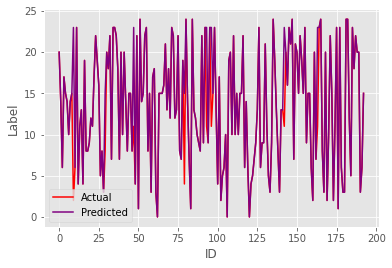

In [48]:
plt.plot(y_test,color='red',label='Actual')
plt.plot(y_test_pred3,color='purple',label="Predicted")
plt.xlabel("ID")
plt.ylabel("Label")
leg = plt.legend()
plt.show()